#Histogram example

[PyLab](http://wiki.scipy.org/PyLab) is a combination of Python, NumPy, SciPy, Matplotlib, and IPython that, according to its documentation, aims to provide a compelling environment for numerical analysis and computation such that, instead of having people go to Python and discovering that it is suitable for numeric computation, they will find PyLab first and then fall in love with Python.

This short example of histogramming data is designed to help you become familiar with PyLab as a potential way to plot your data.

In [6]:
%matplotlib inline
import numpy as np
import pylab as P

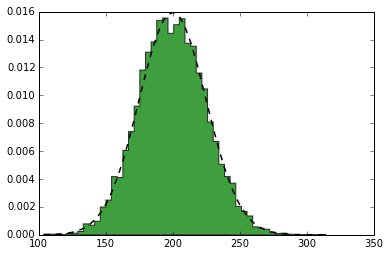

In [8]:
# The hist() function now has a lot more options
# First create a single histogram.
mu, sigma = 200, 25
x = mu + sigma * P.randn(10000)

# the histogram of the data with histtype='step'
n, bins, patches = P.hist(x, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

# add a line showing the expected distribution
y = P.normpdf( bins, mu, sigma)
l = P.plot(bins, y, 'k--', linewidth=1.5)


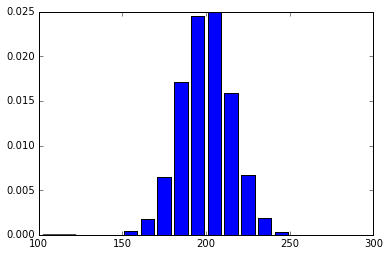

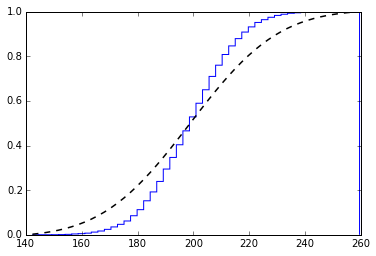

In [10]:
# create a histogram by providing the bin edges (unequally spaced)
P.figure()
bins = [100,125,150,160,170,180,190,200,210,220,230,240,250,275,300]
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)

# now we create a cumulative histogram of the data
P.figure()
n, bins, patches = P.hist(x, 50, normed=1, histtype='step', cumulative=True)

# add a line showing the expected distribution
y = P.normpdf( bins, mu, sigma).cumsum()
y /= y[-1]
l = P.plot(bins, y, 'k--', linewidth=1.5)



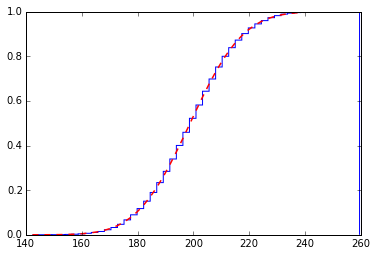

In [11]:
# create a second data-set with a smaller standard deviation
sigma2 = 15.
x = mu + sigma2 * P.randn(10000)

n, bins, patches = P.hist(x, bins=bins, normed=1, histtype='step', cumulative=True)

# add a line showing the expected distribution
y = P.normpdf( bins, mu, sigma2).cumsum()
y /= y[-1]
l = P.plot(bins, y, 'r--', linewidth=1.5)

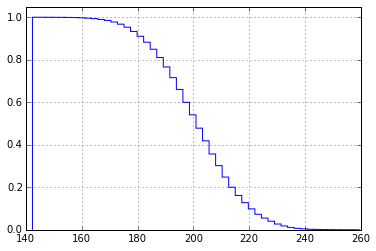

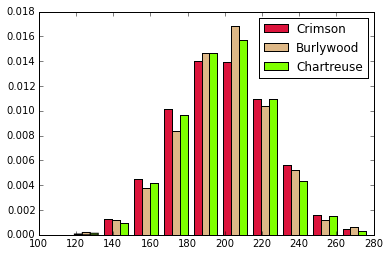

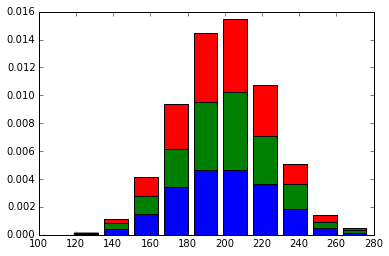

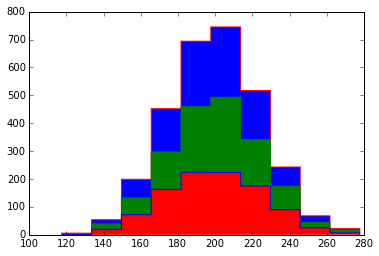

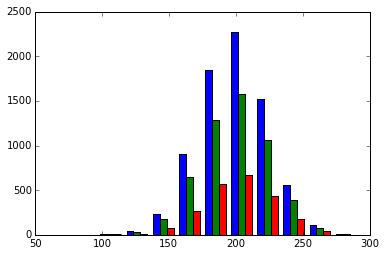

In [12]:
# finally overplot a reverted cumulative histogram
n, bins, patches = P.hist(x, bins=bins, normed=1,
    histtype='step', cumulative=-1)


P.grid(True)
P.ylim(0, 1.05)


#
# histogram has the ability to plot multiple data in parallel ...
# Note the new color kwarg, used to override the default, which
# uses the line color cycle.
#
P.figure()

# create a new data-set
x = mu + sigma * P.randn(1000,3)

n, bins, patches = P.hist(x, 10, normed=1, histtype='bar',
                            color=['crimson', 'burlywood', 'chartreuse'],
                            label=['Crimson', 'Burlywood', 'Chartreuse'])
P.legend()

# ... or we can stack the data
P.figure()

n, bins, patches = P.hist(x, 10, normed=1, histtype='bar', stacked=True)
P.show()

# we can also stack using the step histtype
P.figure()

n, bins, patches = P.hist(x, 10, histtype='step', stacked=True, fill=True)

P.show()

# finally: make a multiple-histogram of data-sets with different length
x0 = mu + sigma * P.randn(10000)
x1 = mu + sigma * P.randn(7000)
x2 = mu + sigma * P.randn(3000)

# and exercise the weights option by arbitrarily giving the first half
# of each series only half the weight of the others:
w0 = np.ones_like(x0)
w0[:len(x0)/2] = 0.5
w1 = np.ones_like(x1)
w1[:len(x1)/2] = 0.5
w2 = np.ones_like(x2)
w2[:len(x2)/2] = 0.5

P.figure()
n, bins, patches = P.hist( [x0,x1,x2], 10, weights=[w0, w1, w2], histtype='bar')
